# Tutorial document for RGB Hexagram (Kondo 2025) with 4-dimensional data

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

# Read RGB hexagram data and confirm the data

(the data generated in RGB_hexagram_tutorial_for_generation.ipynb is used)

(24, 24)


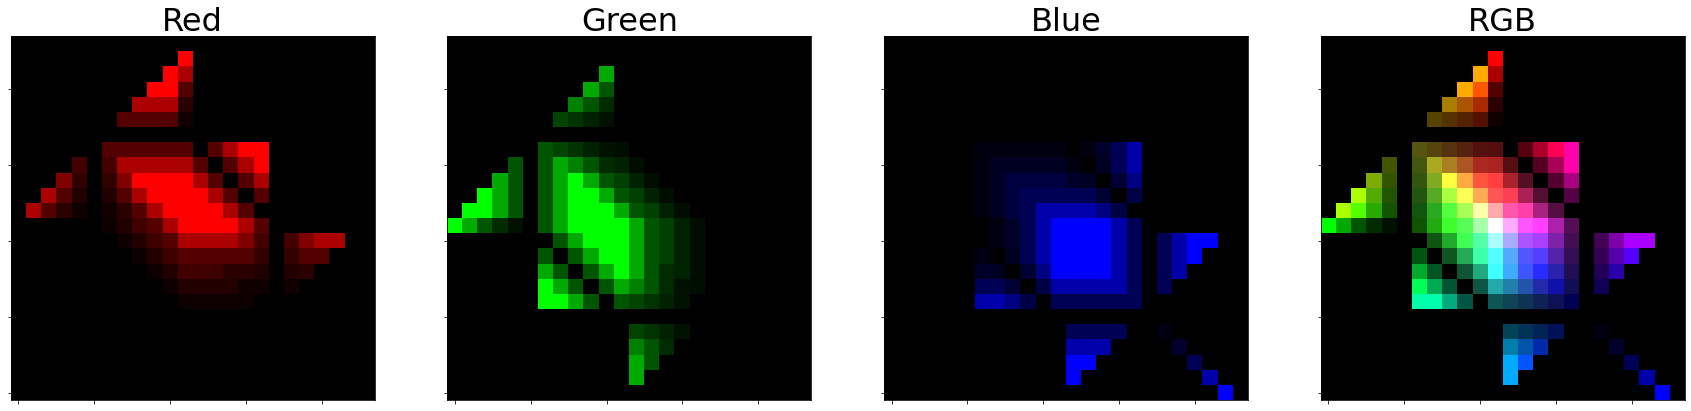

In [2]:
# Read CSV files
r_df = pd.read_csv('rw_hex_test_d.csv', header=None)
g_df = pd.read_csv('gw_hex_test_d.csv', header=None)
b_df = pd.read_csv('bw_hex_test_d.csv', header=None)
n_df = pd.read_csv('nw_hex_test_d.csv', header=None)

# Replace negative values with zero
n_df[n_df < 0] = 0
n_df[n_df > 100] = 0

r_df = r_df.iloc[:, :]
g_df = g_df.iloc[:, :]
b_df = b_df.iloc[:, :]
n_df = n_df.iloc[:, :]

# Normalize RGB values to the range 0~1
r = np.clip(r_df.values, 0, 1)
g = np.clip(g_df.values, 0, 1)
b = np.clip(b_df.values, 0, 1)

# Combine RGB values into a single array
rgb = np.dstack((r, g, b))

# Convert to 1 column
r_series = r_df.stack().reset_index(drop=True)
g_series = g_df.stack().reset_index(drop=True)
b_series = b_df.stack().reset_index(drop=True)

print(r_df.shape)

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(30, 15))
fsiz=32

# Colormap Definition
n_bins = 256  # Colormap fineness
r_colors = [(0, 0, 0), (1, 0, 0)]  # RGB values in the range 0-1
r_cmap_name = 'black_to_red'

g_colors = [(0, 0, 0), (0, 1, 0)]
g_cmap_name = 'black_to_green'

b_colors = [(0, 0, 0), (0, 0, 1)]
b_cmap_name = 'black_to_blue'

# Create color maps
cmr = LinearSegmentedColormap.from_list(r_cmap_name, r_colors, N=n_bins)
cmg = LinearSegmentedColormap.from_list(g_cmap_name, g_colors, N=n_bins)
cmb = LinearSegmentedColormap.from_list(b_cmap_name, b_colors, N=n_bins)

# plotting each data
im1 = axs[0].imshow(r, cmap=cmr, origin='lower')
axs[0].set_title('Red', fontsize=fsiz)
axs[0].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im2 = axs[1].imshow(g, cmap=cmg, origin='lower')
axs[1].set_title('Green', fontsize=fsiz)
axs[1].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im3 = axs[2].imshow(b, cmap=cmb, origin='lower')
axs[2].set_title('Blue', fontsize=fsiz)
axs[2].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im4 = axs[3].imshow(rgb, interpolation='nearest', origin='lower')
axs[3].set_title('RGB', fontsize=fsiz)
axs[3].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

plt.show()

# Creation of sample data for tutorial (4D data)

This 4-dimensional tutorial on RGB hexagrams is demonstrated using 4-dimensional sample data of examination results in 3 subjects and study time.

In [3]:
# Average scores (settable for each subject)
mean_scores = [20, 55, 75, 150]  # 

# Standard deviation
std_dev = 15

# Random seed
np.random.seed(0)

# Number of persons
psn = 100000

# Generate scores (psn x number of subjects)
scores = np.random.normal(loc=mean_scores, scale=std_dev, size=(psn, len(mean_scores)))

# Round to nearest integer
scores = np.rint(scores)

# Create max score array: default 100, but 200 for subjects with mean 150
max_scores = np.where(np.array(mean_scores) == 150, 200, 100)

# Clip each column individually using broadcasting
scores = np.clip(scores, -1, max_scores)

# Convert to int
scores = scores.astype(int)

# Display top 5 rows
print(scores[:5])

[[ 46  61  90 184]
 [ 48  40  89 148]
 [ 18  61  77 172]
 [ 31  57  82 155]
 [ 42  52  80 137]]


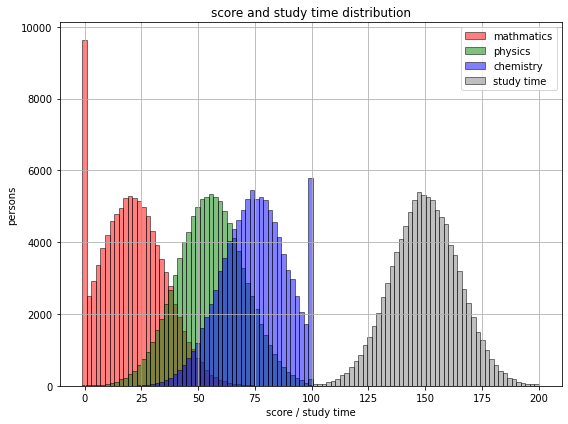

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Colors and labels for each subject
subjects = ['mathmatics', 'physics', 'chemistry', 'study time']
colors = ['red', 'green', 'blue', 'gray']

plt.figure(figsize=(8, 6))

# Histogram of each subject plotted over one another
for i in range(4):
    plt.hist(scores[:, i],
             bins=101,
             range=(-1, 200),
             alpha=0.5,
             color=colors[i],
             label=subjects[i],
             edgecolor='black')

plt.title('score and study time distribution')
plt.xlabel('score / study time')
plt.ylabel('persons')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Data normalization

In [5]:
import numpy as np

# Prepare an empty array for normalization (same shape)
normalized_scores = np.zeros_like(scores, dtype=float)

# Normalized (per column) for each subject
for i in range(scores.shape[1]-1):
    max_val = np.max(scores[:, i])
    normalized_scores[:, i] = (scores[:, i] + 1) / (max_val + 1)  # -1点→0, max→1になるよう調整

normalized_scores[:, 3] = scores[:, 3]
# Display of top 5 rows
print(normalized_scores[:5])

[[  0.55294118   0.61386139   0.9009901  184.        ]
 [  0.57647059   0.40594059   0.89108911 148.        ]
 [  0.22352941   0.61386139   0.77227723 172.        ]
 [  0.37647059   0.57425743   0.82178218 155.        ]
 [  0.50588235   0.52475248   0.8019802  137.        ]]


Identify the coordinates of the normalized data on the RGB hexagram. <br>
One is added after the coordinates are identified, but the variable to be added is arbitrary.

In [6]:
#initialized position data
vertical_range = np.linspace(50, 200, 151)
pos_data_rgb = np.zeros((r.shape[0], r.shape[1], vertical_range.shape[0])) # np.maxval(scores)

start_time = time.time()

for i in range(psn):
    tmp_data_rgb = np.zeros((r.shape[0], r.shape[1]))
    tmp_data_r   = np.zeros((r.shape[0], r.shape[1]))+normalized_scores[i,0]
    tmp_data_g   = np.zeros((r.shape[0], r.shape[1]))+normalized_scores[i,1]
    tmp_data_b   = np.zeros((r.shape[0], r.shape[1]))+normalized_scores[i,2]
    
    # Calculate the value of the difference in each coordinate of the RGB hexagram
    tmp_data_rgb = (r-tmp_data_r)**2.0 + (g-tmp_data_g)**2.0 + (b-tmp_data_b)**2.0
    
    # Get the index (coordinates) of the minimum value
    min_index = np.unravel_index(np.argmin(tmp_data_rgb), tmp_data_rgb.shape)
    v_index = np.argmin(np.abs(vertical_range - normalized_scores[i,3]))
    
    # Add 1 to the corresponding coordinates (in this case, the number of persons, but any variable can be used)
    pos_data_rgb[min_index[0],min_index[1],v_index] += 1

end_time = time.time()

elapsed_time = end_time - start_time
print(f"elapsed time: {elapsed_time:.2f} sec, data size:",psn)

print(pos_data_rgb.shape)

elapsed time: 3.54 sec, data size: 100000
(24, 24, 151)


Distribution of data on RGB hexagram

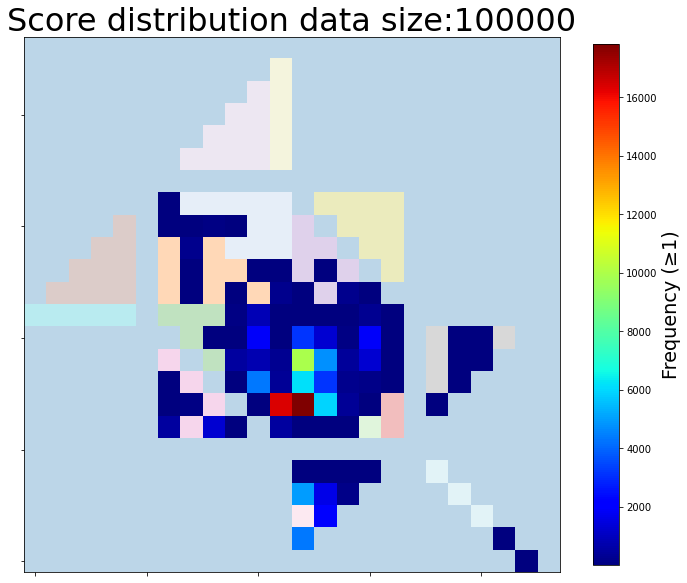

In [7]:
# Mask to plot only areas with a value greater than or equal to 1
masked_data = np.ma.masked_less(pos_data_rgb, 1)

# Plot the results and add a color bar
fig, axs = plt.subplots(1, 1, figsize=(12, 12))
fsiz=32
im = axs.imshow(n_df, cmap='tab20', origin='lower',alpha=0.3)
im = axs.imshow(np.sum(masked_data,axis=2), cmap='jet', origin='lower')

# Added color bar
cbar = plt.colorbar(im, ax=axs, shrink=0.8)
cbar.set_label('Frequency (≥1)', fontsize=fsiz * 0.6)

axs.set_title('Score distribution data size:'+str(psn), fontsize=fsiz)
axs.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Frequency of study time for each Area in RGB hexagram

Plot histograms of the frequency of study time in each Area of the RGB hexagram.

i_area: 1
i_area: 2
i_area: 3
i_area: 4
i_area: 5
i_area: 6
i_area: 7
i_area: 8
i_area: 9
i_area: 10
i_area: 11
i_area: 12
i_area: 13
i_area: 14
i_area: 15


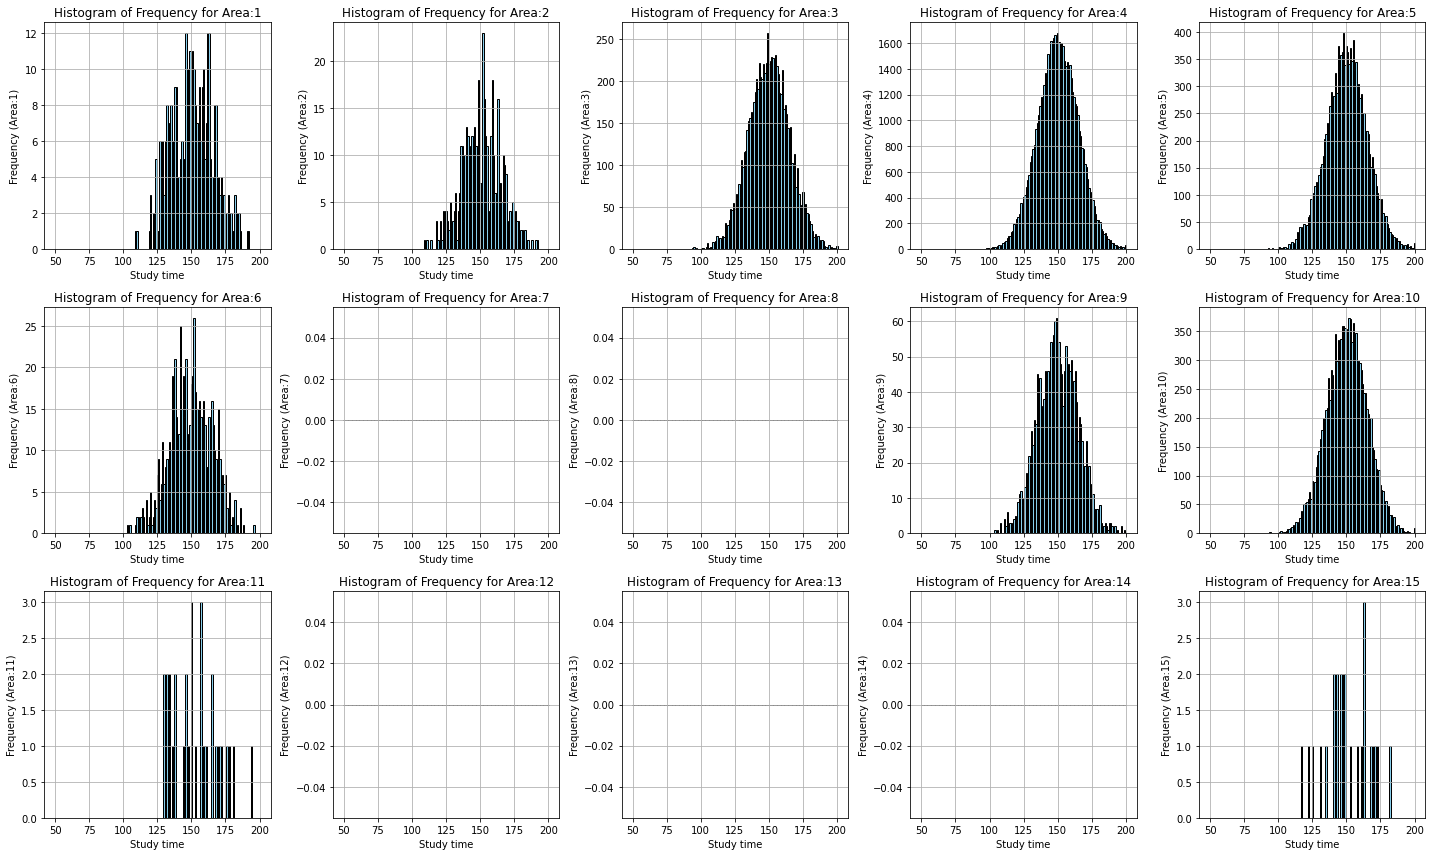

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots (5x3 layout)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()  # Convert 2D array to 1D

for i_area in range(15):
    # Sum of the coordinates corresponding to n_def == i_area (each Area shown in Kondo 2025) in pos_data_rgb
    target_mask = (n_df*256.0 == float(i_area+1))
    print("i_area:",i_area+1)
    selected_values = pos_data_rgb[target_mask, :]  # shape: (number of pixels, vertical_range)
    
    # Total value per vertical_range (for histogram)
    hist_data = np.sum(selected_values, axis=0)
    
    # Plotting Histograms
    ax = axes[i_area]
    ax.bar(vertical_range, hist_data, width=1.0, color='skyblue', edgecolor='black')
    ax.set_xlabel('Study time')
    ax.set_ylabel('Frequency (Area:'+str(i_area+1)+')')
    ax.set_title('Histogram of Frequency for Area:'+str(i_area+1))
    ax.grid(True)

plt.tight_layout()
plt.show()
